<a href="https://colab.research.google.com/github/Killerfish8/Thesis/blob/main/Warehouse_and_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**Warehouse and Retail Sales:-**           

This research aims to analyze trends and interpret sales and movement data across various items and departments in both warehouse and retail settings. The dataset used consists of monthly records detailing sales and transfers by item and department. By exploring this dataset, the study seeks to uncover significant patterns, correlations, and insights crucial for optimizing inventory management, refining sales strategies, and enhancing supplier relationships.

The analysis will encompass identifying seasonal trends, evaluating the performance of different item types and departments, and assessing the impact of retail transfers on sales outcomes. Insights gained from this research will aid stakeholders in making informed decisions to improve operational efficiencies and strategic planning within the supply chain.


**Solution and Steps:-**

**1. Exploratory Data Analysis**

**2. Data Pre-processing**

**3. Model Implementation**

**4. Performance Evaluation**

**5. Result Analysis and Discussion**

**Exoloratory Data Analysis**

In [21]:
import pandas as pd # pandas: This library is used for data manipulation and analysis. It provides data structures like DataFrames which make it easy to work with structured data.
import numpy as np # numpy: This library is used for numerical operations on arrays. It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt  # matplotlib.pyplot: This is a plotting library used for creating static, interactive, and animated visualizations in Python. It's widely used for generating plots, histograms, bar charts, and other types of visualizations.
import seaborn as sns # seaborn: This is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [22]:
# Reading a CSV file into a pandas DataFrame
df = pd.read_csv('/content/Warehouse_and_Retail_Sales_20240720.csv')
# pd.read_csv: This function is used to read a comma-separated values (CSV) file into a pandas DataFrame.

In [23]:
# Displaying the first 5 rows of the DataFrame
print(df.head(5))
# df.head(5): This method displays the first 5 rows of the DataFrame 'df'.
# It's useful for quickly inspecting the structure and content of the data.

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE         0.00   
1            MOMENT DE PLAISIR - 750ML      WINE         0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER         0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE         0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE         0.82   

  RETAIL TRANSFERS WAREHOUSE SALES  
0             0.00            2.00  
1             1.00            4.00  
2             0.00            1.00  
3             0.00            1.00  
4             0.00            0.00  


In [24]:
# Displaying the last 5 rows of the DataFrame
print(df.tail(5))
# df.tail(5): This method displays the last 5 rows of the DataFrame 'df'.
# It's useful for checking the end of the dataset and ensuring completeness.

        YEAR  MONTH                        SUPPLIER ITEM CODE  \
282365  2019     10             BRONCO WINE COMPANY     83386   
282366  2019     10                FETZER VINEYARDS     83390   
282367  2019     10  JACKSON FAMILY ENTERPRISES INC     83399   
282368  2019     10              E & J GALLO WINERY     83402   
282369  2019     10          FOLEY FAMILY WINES INC     83410   

                             ITEM DESCRIPTION ITEM TYPE RETAIL SALES  \
282365     COLORES DEL SOL  TORRONTES - 750ML      WINE         4.21   
282366                   BONTERRA ZIN - 750ML      WINE         3.89   
282367       K JACKSON VINT RES CHARD - 750ML      WINE       122.05   
282368  MACMURRAY RANCH SONOMA P/GRIS - 750ML      WINE         0.80   
282369          SEBASTIANI SONOMA CAB - 750ML         W          NaN   

       RETAIL TRANSFERS WAREHOUSE SALES  
282365             5.00            2.00  
282366             1.00            4.00  
282367           226.92          410.00  
282368  

In [25]:
# Displaying the column names of the DataFrame
print(df.columns)
# df.columns: This attribute returns the column labels of the DataFrame 'df'.
# It's useful for getting an overview of all the columns present in the dataset.

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')


In [26]:
# Displaying the shape of the DataFrame
print(df.shape)
# df.shape: This attribute returns a tuple representing the dimensionality of the DataFrame 'df'.
# The tuple contains two elements: the number of rows and the number of columns in the DataFrame.
# Calling print() ensures that the shape tuple is displayed immediately.

(282370, 9)


In [27]:
# Displaying the concise summary of the DataFrame
print(df.info())
# df.info(): This method provides a concise summary of the DataFrame 'df'.
# It includes information about the number of entries (rows), each column's data type, and memory usage.
# Calling print() ensures that the summary is displayed immediately.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282370 entries, 0 to 282369
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   YEAR              282370 non-null  int64 
 1   MONTH             282370 non-null  int64 
 2   SUPPLIER          282225 non-null  object
 3   ITEM CODE         282370 non-null  object
 4   ITEM DESCRIPTION  282370 non-null  object
 5   ITEM TYPE         282369 non-null  object
 6   RETAIL SALES      282368 non-null  object
 7   RETAIL TRANSFERS  282369 non-null  object
 8   WAREHOUSE SALES   282369 non-null  object
dtypes: int64(2), object(7)
memory usage: 19.4+ MB
None


In [28]:
# Displaying the data types of each column in the DataFrame
print(df.dtypes)
# df.dtypes: This attribute returns the data type of each column in the DataFrame 'df'.
# It's useful for understanding how pandas has interpreted the data types from the CSV file.

YEAR                 int64
MONTH                int64
SUPPLIER            object
ITEM CODE           object
ITEM DESCRIPTION    object
ITEM TYPE           object
RETAIL SALES        object
RETAIL TRANSFERS    object
WAREHOUSE SALES     object
dtype: object


In [29]:
# Displaying summary statistics of the DataFrame
print(df.describe())
# df.describe(): This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the numerical columns in the DataFrame 'df'.
# It provides statistics such as count, mean, standard deviation, minimum, maximum, and various quantiles (25%, 50%, and 75%).
# This is particularly useful for gaining insights into the distribution and variability of numerical data in your dataset.
# Calling print() ensures that the summary statistics are displayed immediately.

                YEAR          MONTH
count  282370.000000  282370.000000
mean     2018.347955       6.098573
std         1.075181       3.418097
min      2017.000000       1.000000
25%      2017.000000       3.000000
50%      2019.000000       7.000000
75%      2019.000000       9.000000
max      2020.000000      12.000000


In [30]:
# Finding unique values in the 'Item_Type' column
unique_items = df['ITEM TYPE'].unique()
# Printing unique values
print("All Unique Items:\n")
print(unique_items)

All Unique Items:

['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'REF' 'DUNNAGE'
 'NON-ALCOHOL' nan 'W']


In [31]:
# Assuming df is already loaded from a CSV file as shown earlier
# Counting duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()
# df.duplicated(): This method returns a boolean Series indicating duplicate rows in the DataFrame.
# Each row is marked as True if it is a duplicate of a previous row; otherwise, it is marked as False.
# sum(): This function sums up the True values (which represent duplicates) in the boolean Series, giving the total count of duplicate rows.
print("Number of duplicate rows in the DataFrame:", duplicate_count)

Number of duplicate rows in the DataFrame: 0


In [32]:
# Assuming df is already loaded from a CSV file as shown earlier
# Counting missing values in each column of the DataFrame
missing_values_count = df.isna().sum()
# df.isna(): This method returns a boolean DataFrame where each cell is True if the corresponding element is NaN, and False otherwise.
# sum(): This function sums up the True values (which represent missing values) along each column axis, giving the total count of missing values in each column.
print("Missing values in each column:")
print(missing_values_count)

Missing values in each column:
YEAR                  0
MONTH                 0
SUPPLIER            145
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          2
RETAIL TRANSFERS      1
WAREHOUSE SALES       1
dtype: int64


In [33]:
df.dropna(axis=0, inplace=True)
# Using dropna() with inplace=True is efficient for quickly cleaning up your DataFrame by removing rows or columns with missing values before proceeding with analysis or modeling.

In [34]:
# Renaming the column names
df.rename(columns={'YEAR' : 'Year',
                        'MONTH' : 'Month',
                        'SUPPLIER' : 'Supplier',
                        'ITEM CODE' : 'Item_Code',
                        'ITEM DESCRIPTION' : 'Item_Description',
                        'ITEM TYPE' : 'Item_Type',
                        'RETAIL SALES' : 'Retail_Sales',
                        'RETAIL TRANSFERS' : 'Retail_Transfers',
                        'WAREHOUSE SALES' : 'Warehouse_Sales'}, inplace=True)

In [35]:
# Convert columns to numeric, forcing errors to NaN
df['Retail_Sales'] = pd.to_numeric(df['Retail_Sales'], errors='coerce')
df['Retail_Transfers'] = pd.to_numeric(df['Retail_Transfers'], errors='coerce')
df['Warehouse_Sales'] = pd.to_numeric(df['Warehouse_Sales'], errors='coerce')

In [36]:
df.isna().sum()

,0
Year,0
Month,0
Supplier,0
Item_Code,0
Item_Description,0
Item_Type,0
Retail_Sales,27
Retail_Transfers,29
Warehouse_Sales,1135


In [37]:
# Convert YEAR and MONTH to datetime
df['DATE'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
# Check data types
print(df.dtypes)

Year                         int64
Month                        int64
Supplier                    object
Item_Code                   object
Item_Description            object
Item_Type                   object
Retail_Sales               float64
Retail_Transfers           float64
Warehouse_Sales            float64
DATE                datetime64[ns]
dtype: object


In [38]:
# Convert numerical columns to appropriate data types
numeric_columns = ['Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales']
# Check data types
print(df.dtypes)

Year                         int64
Month                        int64
Supplier                    object
Item_Code                   object
Item_Description            object
Item_Type                   object
Retail_Sales               float64
Retail_Transfers           float64
Warehouse_Sales            float64
DATE                datetime64[ns]
dtype: object


In [39]:
# Handle invalid literals and convert to float
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

In [40]:
# Ensure non-numeric columns are not included in the sum
numeric_df = df[numeric_columns + ['Year', 'Month']]

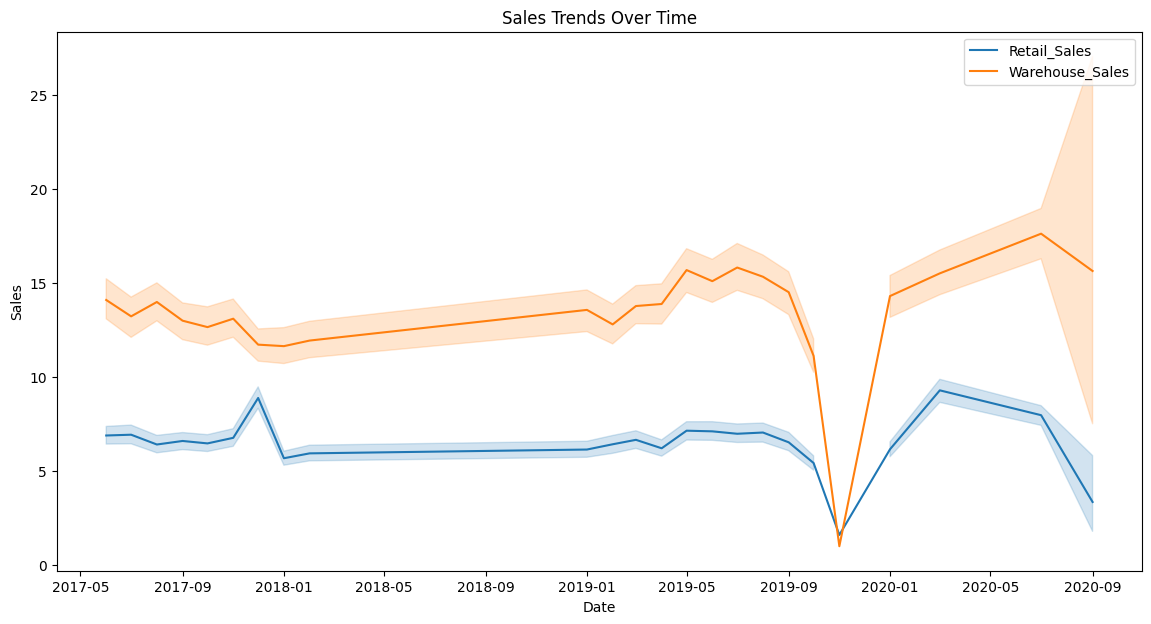

In [41]:
# Sales trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='DATE', y='Retail_Sales', label='Retail_Sales')
sns.lineplot(data=df, x='DATE', y='Warehouse_Sales', label='Warehouse_Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

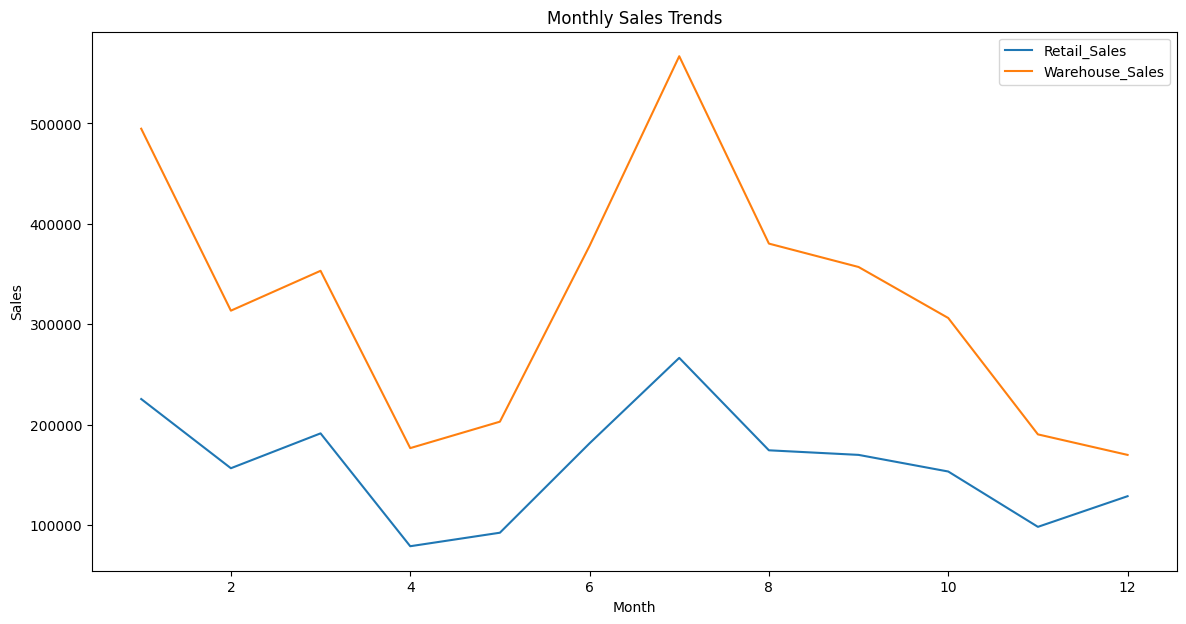

In [42]:
# Monthly sales trends
monthly_sales = numeric_df.groupby('Month').sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Retail_Sales', label='Retail_Sales')
sns.lineplot(data=monthly_sales, x='Month', y='Warehouse_Sales', label='Warehouse_Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

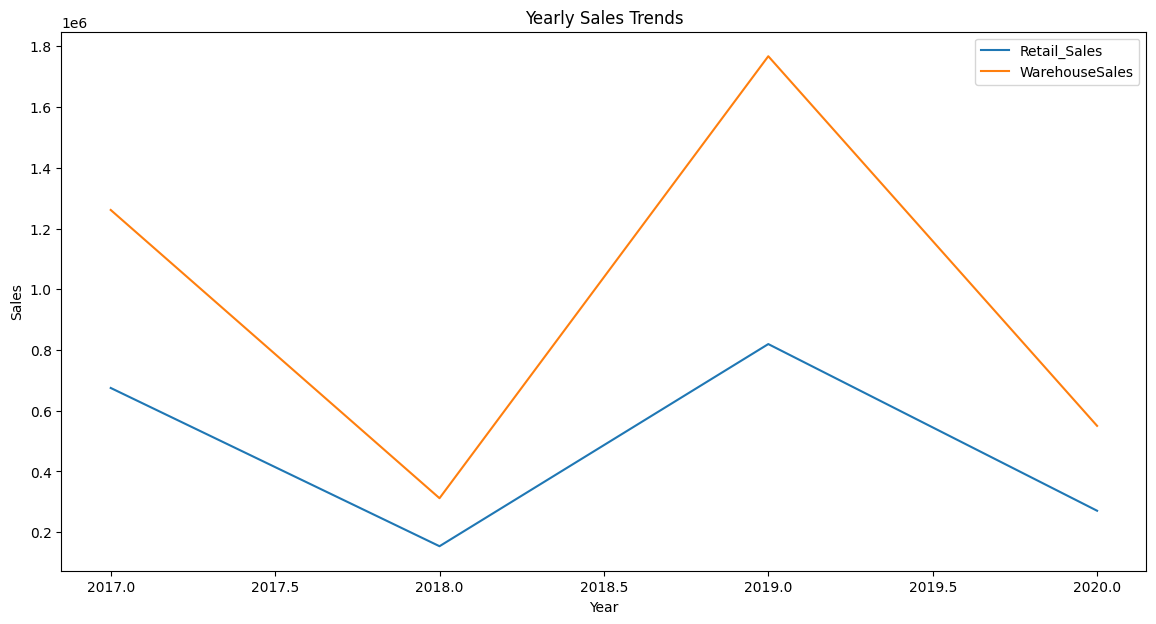

In [43]:
# Yearly sales trends
yearly_sales = numeric_df.groupby('Year').sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_sales, x='Year', y='Retail_Sales', label='Retail_Sales')
sns.lineplot(data=yearly_sales, x='Year', y='Warehouse_Sales', label='WarehouseSales')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [44]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_Code', 'Item_Description',
       'Item_Type', 'Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales',
       'DATE'],
      dtype='object')

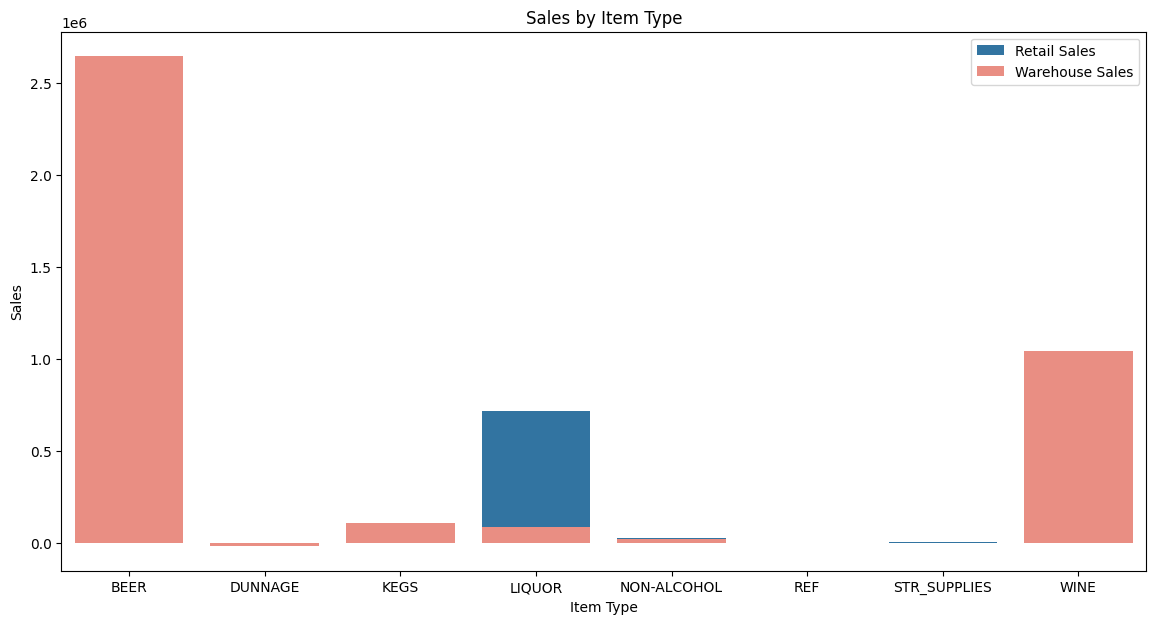

In [45]:
# Sales by Item Type
item_sales = df.groupby('Item_Type')[numeric_columns].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=item_sales, x='Item_Type', y='Retail_Sales', label='Retail Sales')
sns.barplot(data=item_sales, x='Item_Type', y='Warehouse_Sales', label='Warehouse Sales', color='salmon')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

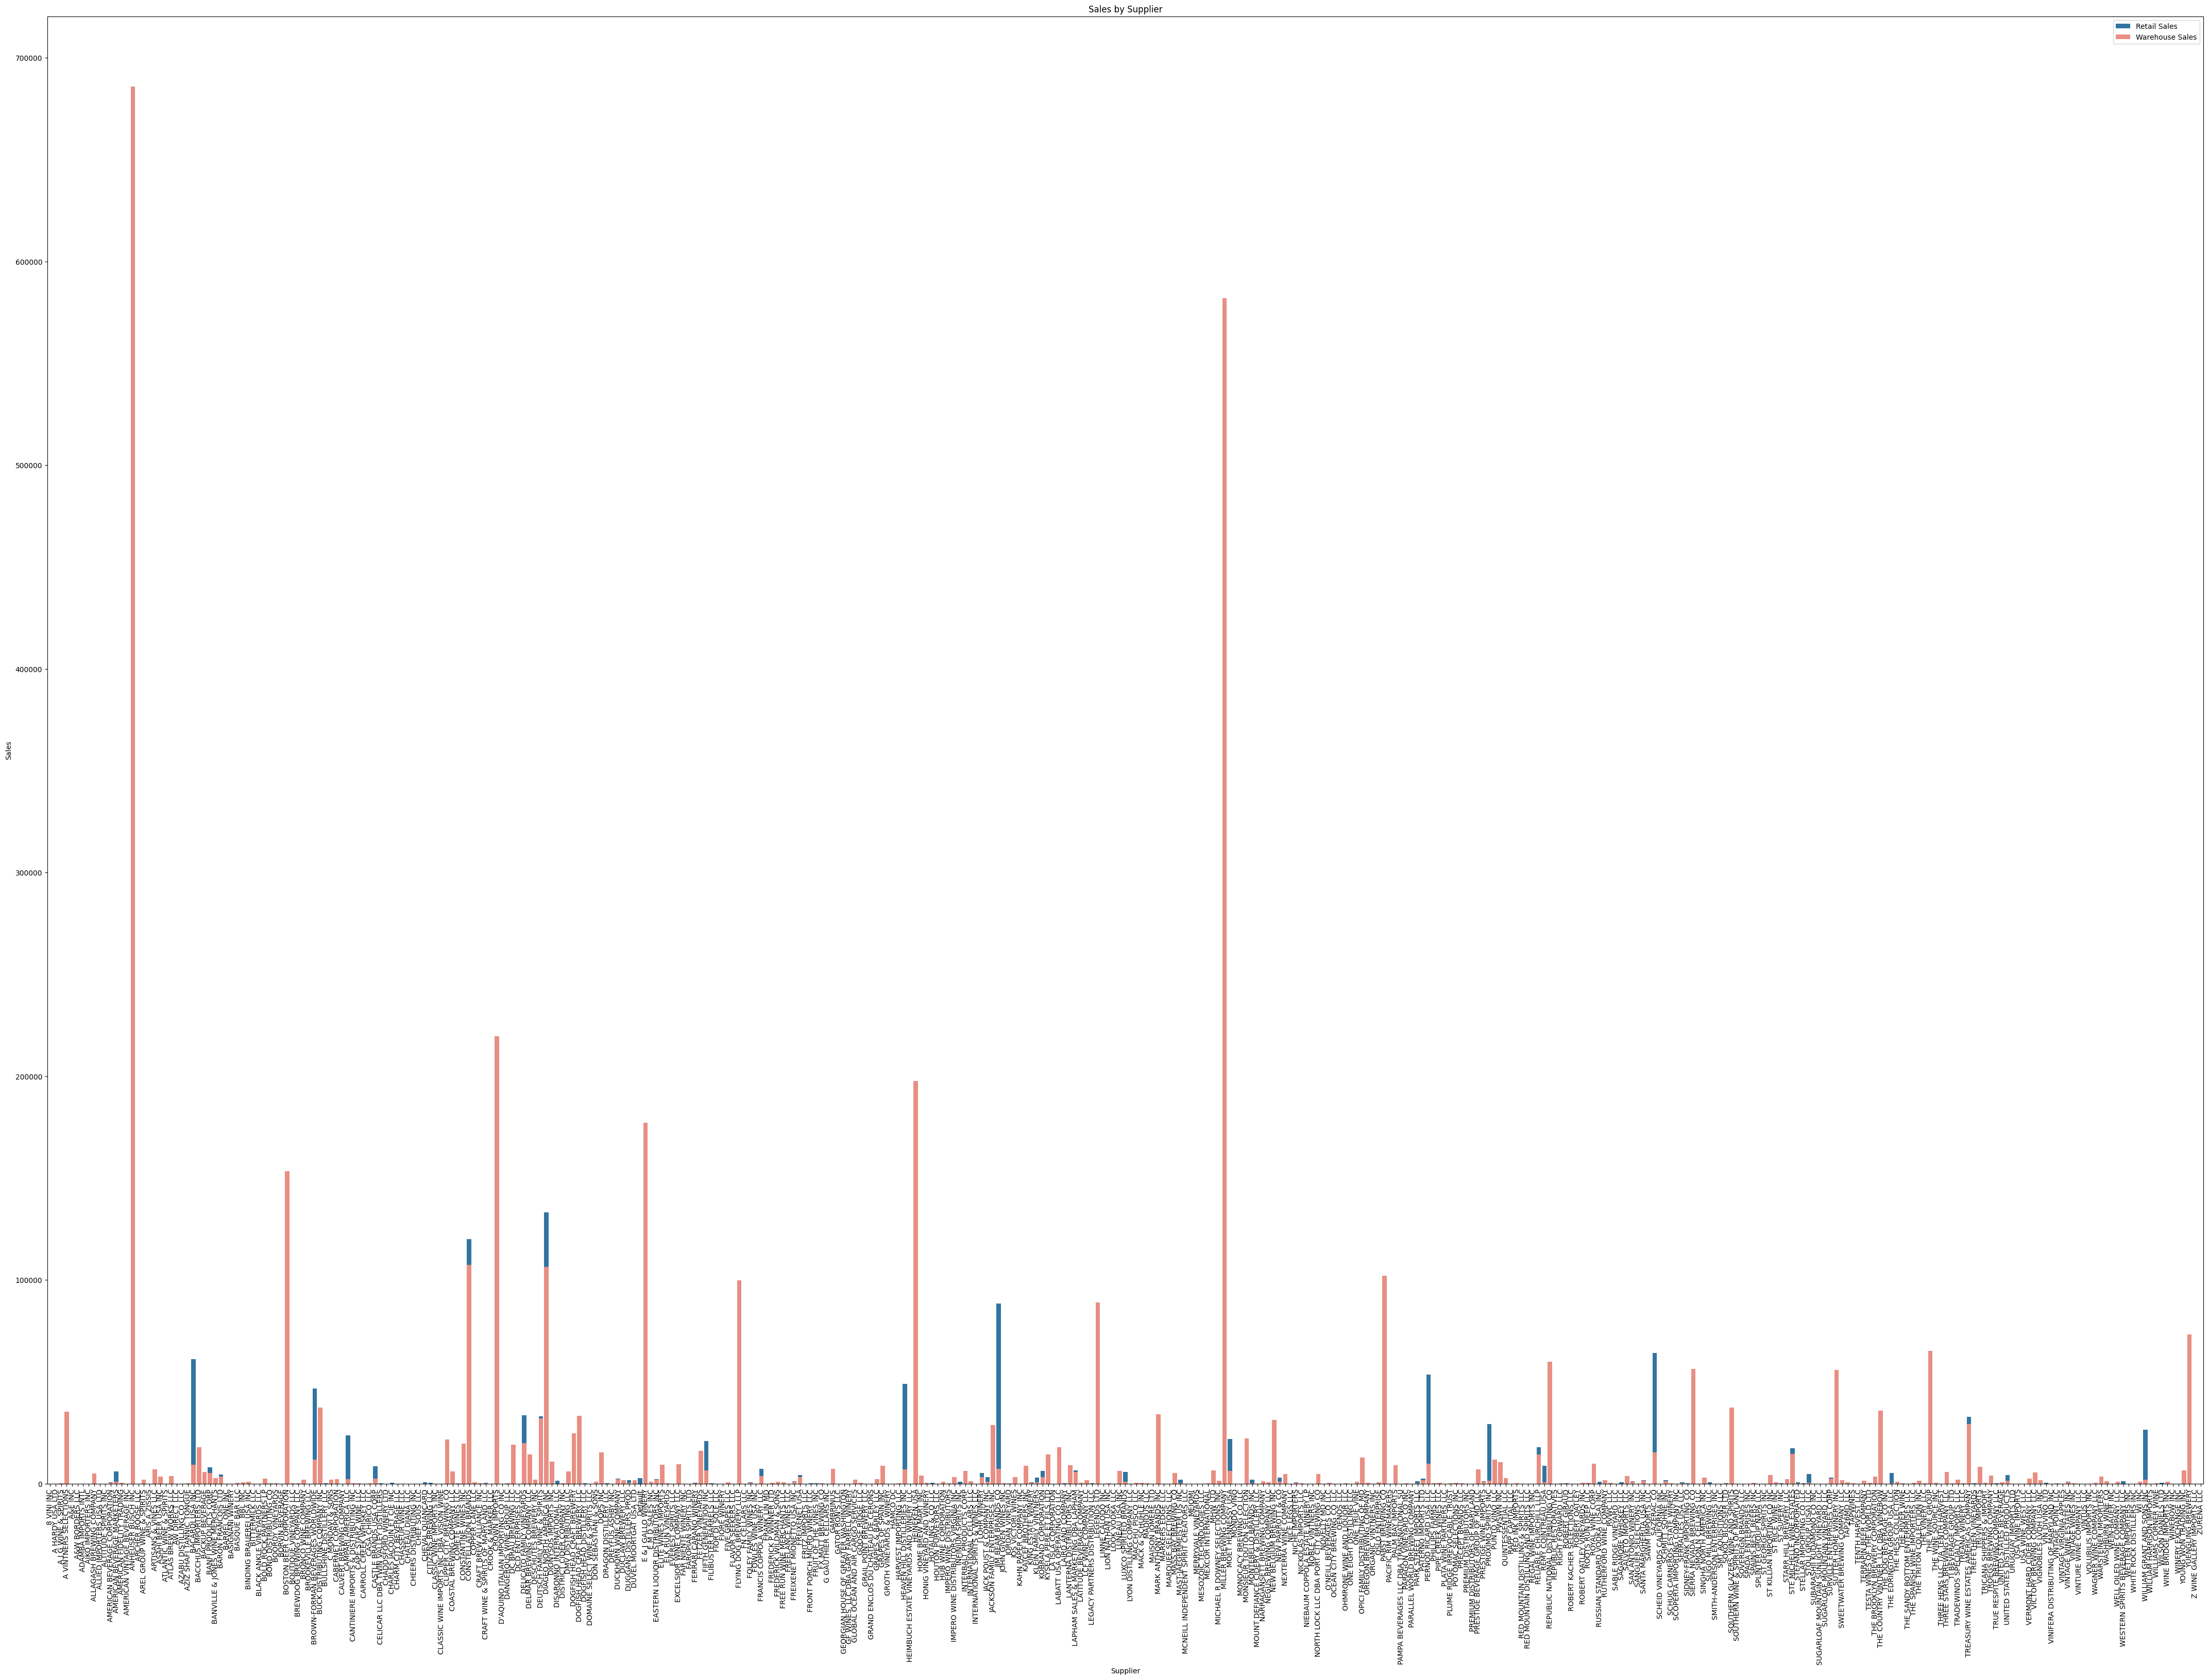

In [46]:
# Sales by Supplier
supplier_sales = df.groupby('Supplier')[numeric_columns].sum().reset_index()
plt.figure(figsize=(54, 37))
sns.barplot(data=supplier_sales, x='Supplier', y='Retail_Sales', label='Retail Sales')
sns.barplot(data=supplier_sales, x='Supplier', y='Warehouse_Sales', label='Warehouse Sales', color='salmon')
plt.title('Sales by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Item Wise Count 

Item_Type
WINE            172150
LIQUOR           59934
BEER             38604
KEGS              9404
NON-ALCOHOL       1701
STR_SUPPLIES       289
REF                 75
DUNNAGE             66
Name: count, dtype: int64


Text(0.5, 0, 'Item Type')

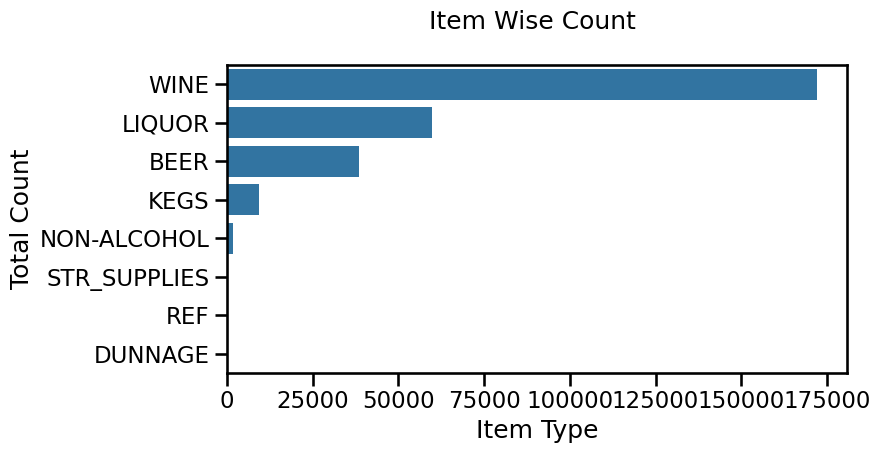

In [47]:
# Item wise count
DataSet = df.dropna()
ItemCount = DataSet["Item_Type"].value_counts().nlargest(10)
print("Item Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(8,4))
sns.countplot(DataSet['Item_Type'],order = DataSet['Item_Type'].value_counts().index)
plt.title('Item Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

<Axes: xlabel='Item_Type'>

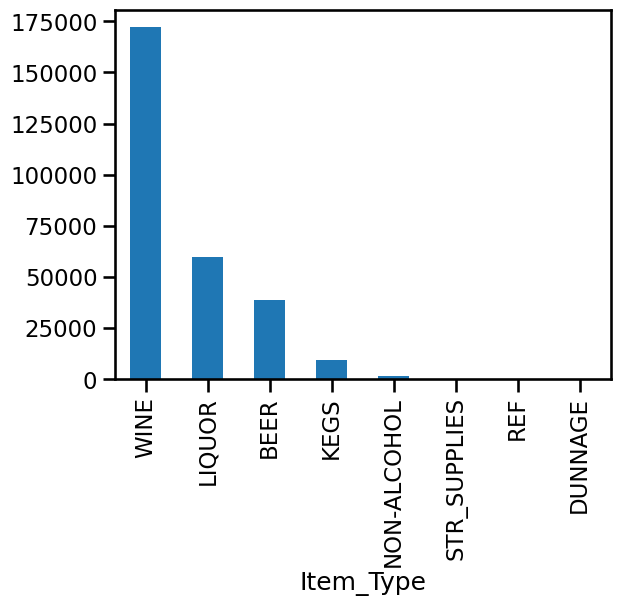

In [48]:
df['Item_Type'].value_counts().plot(kind="bar")

,Supplier,Retail_Sales
0,E & J GALLO WINERY,149661.67
1,DIAGEO NORTH AMERICA INC,133083.70
2,CONSTELLATION BRANDS,120112.79
3,ANHEUSER BUSCH INC,99113.03
4,JIM BEAM BRANDS CO,88371.73
5,MILLER BREWING COMPANY,79009.37
6,SAZERAC CO,64167.45
7,CROWN IMPORTS,61190.96
8,BACARDI USA INC,61169.28
9,THE WINE GROUP,57874.33


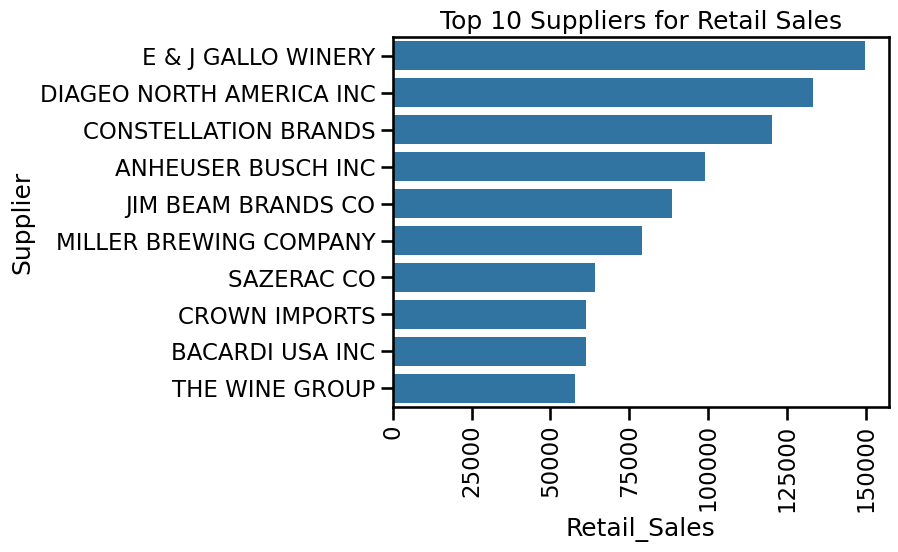

In [49]:
profit=df.groupby("Supplier")['Retail_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
display(profit)
sns.barplot(data=profit,y='Supplier',x='Retail_Sales')
plt.title('Top 10 Suppliers for Retail Sales')
plt.xticks(rotation=90)
plt.show()

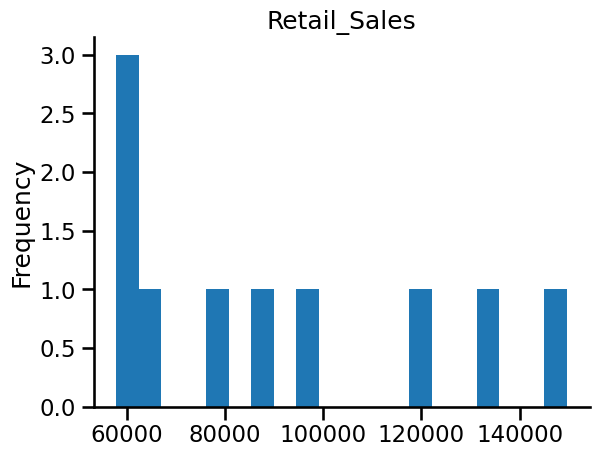

In [50]:
# @title Retail_Sales
from matplotlib import pyplot as plt
profit['Retail_Sales'].plot(kind='hist', bins=20, title='Retail_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

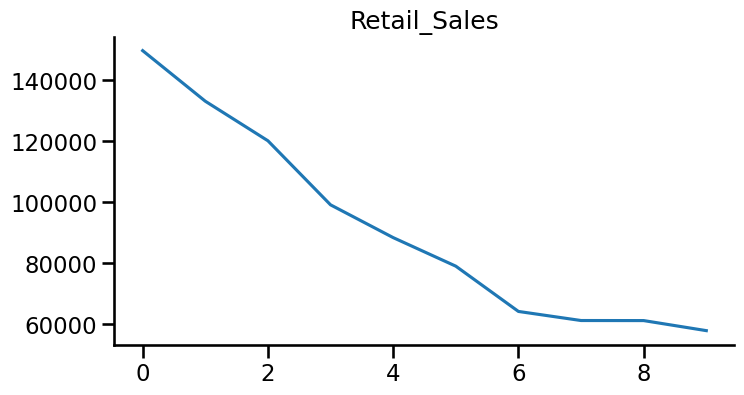

In [51]:
# @title Retail_Sales
from matplotlib import pyplot as plt
profit['Retail_Sales'].plot(kind='line', figsize=(8, 4), title='Retail_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

,Supplier,Warehouse_Sales
0,ANHEUSER BUSCH INC,685980.43
1,MILLER BREWING COMPANY,581868.88
2,CROWN IMPORTS,219761.46
3,HEINEKEN USA,197632.67
4,E & J GALLO WINERY,177112.43
5,BOSTON BEER CORPORATION,153312.70
6,CONSTELLATION BRANDS,107364.82
7,DIAGEO NORTH AMERICA INC,106335.86
8,PABST BREWING CO,102119.90
9,FLYING DOG BREWERY LLLP,99758.03


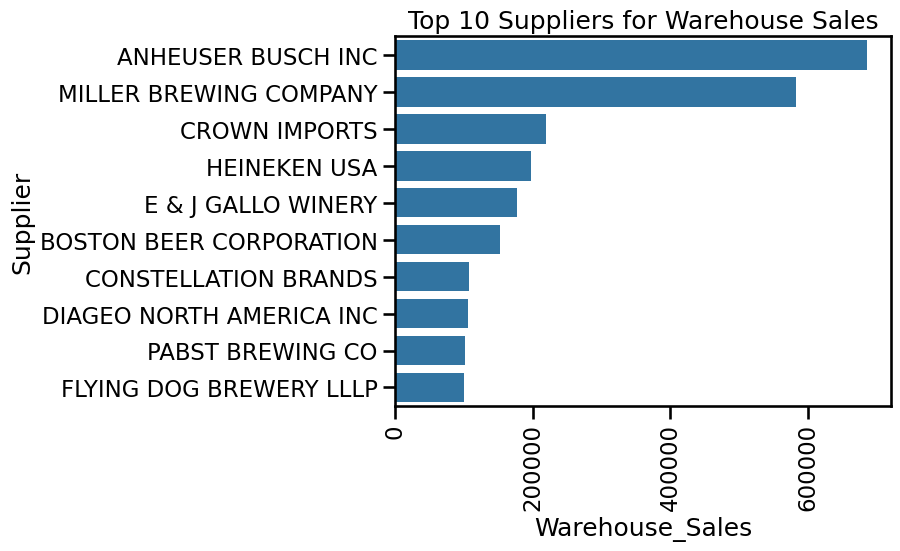

In [52]:
pro=df.groupby("Supplier")['Warehouse_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
display(pro)
sns.barplot(data=pro,y='Supplier',x='Warehouse_Sales')
plt.title('Top 10 Suppliers for Warehouse Sales')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Item Type')

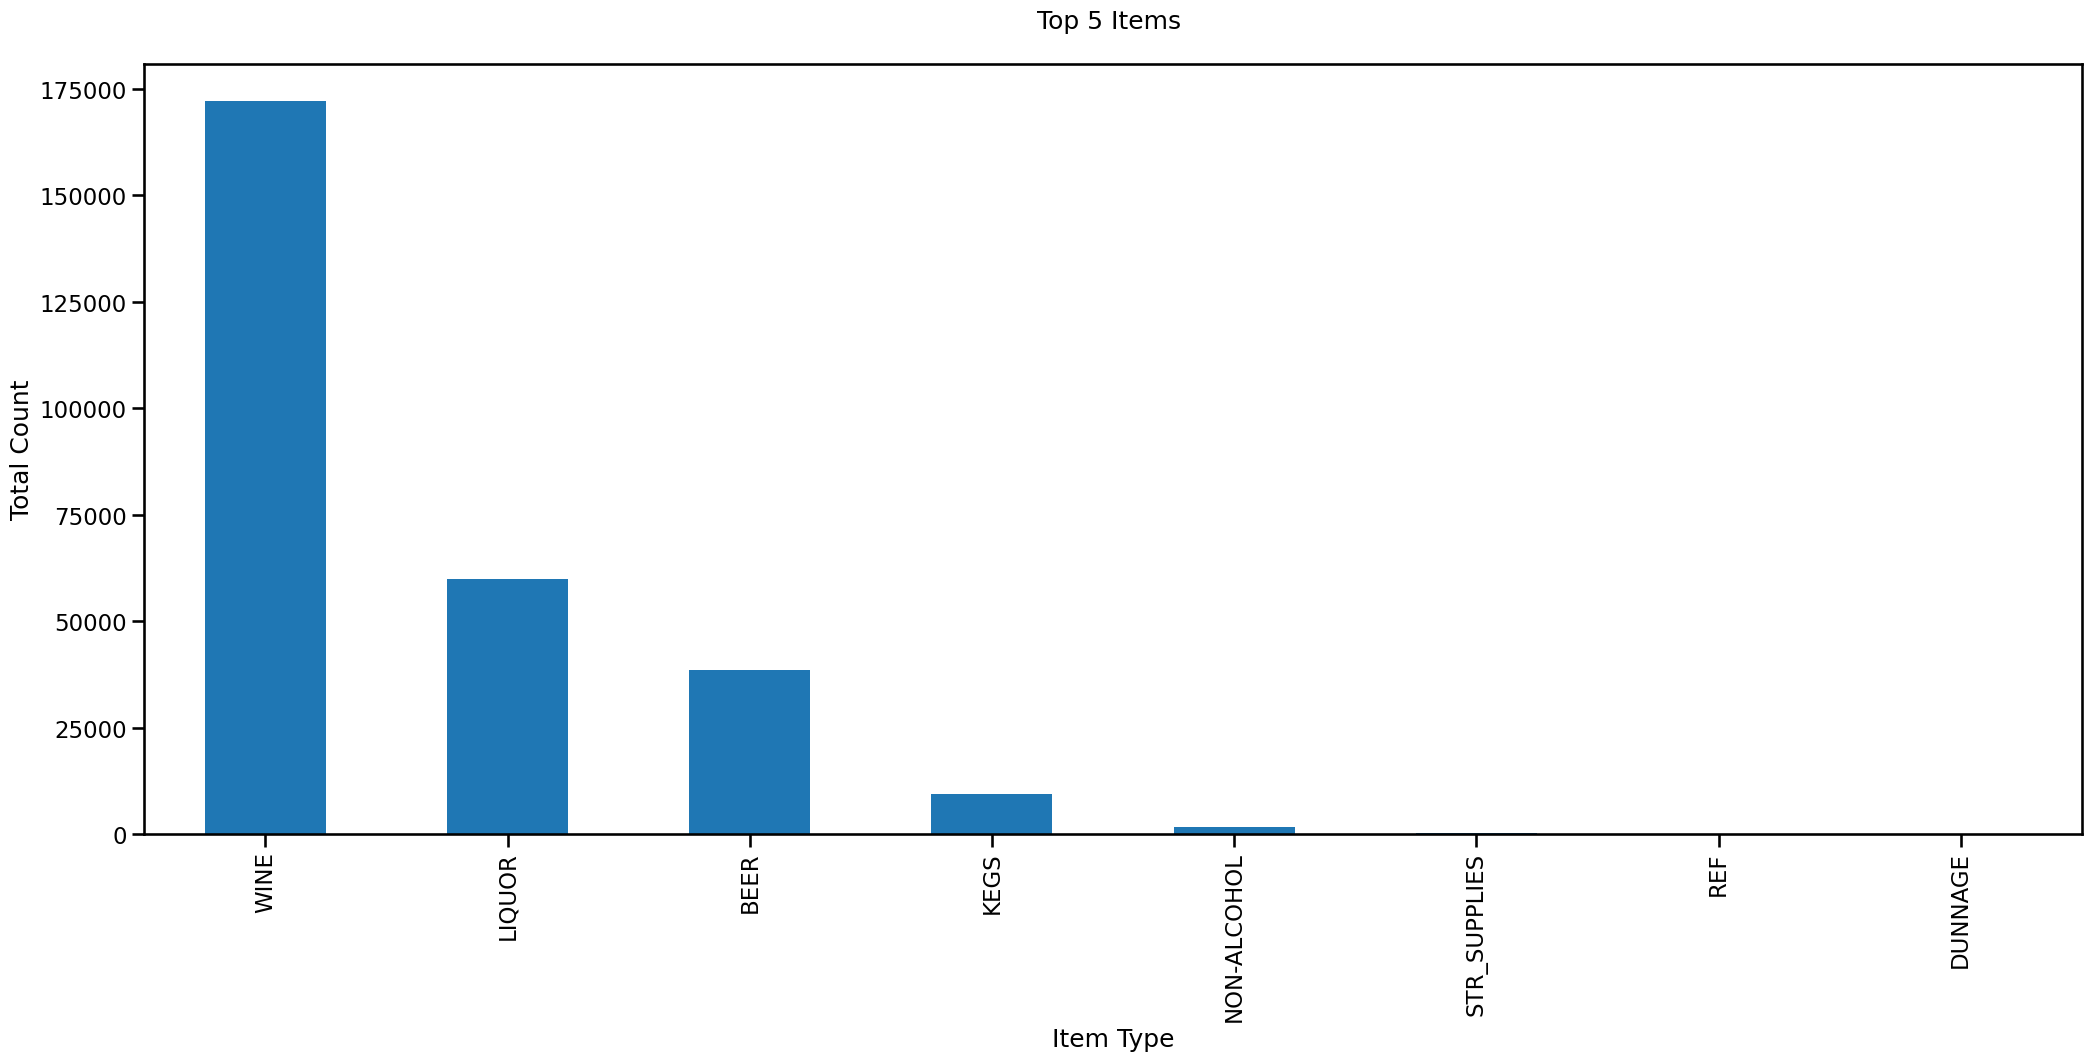

In [53]:
# Top 8 Items in Bar Chart
plt.figure(figsize=(25,10))
GraphData=DataSet.groupby('Item_Type').size().nlargest(8)
GraphData.plot(kind='bar')
plt.title('Top 5 Items \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

Text(0, 0.5, 'Item')

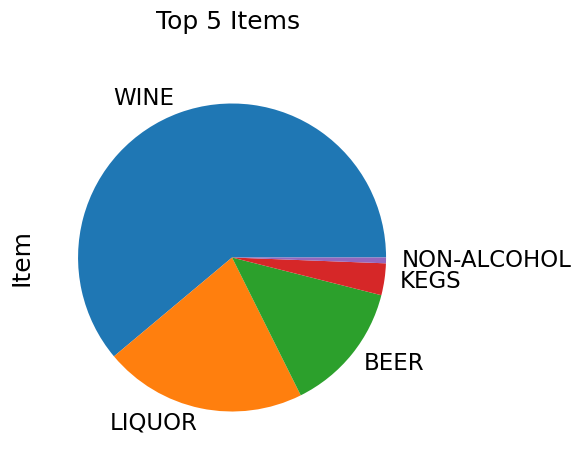

In [54]:
# Draw Pie Chart
plt.figure(figsize=(6,5))
DataSet['Item_Type'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

Top 10 Wine Suppliers 

Supplier
REPUBLIC NATIONAL DISTRIBUTING CO       15612
MONSIEUR TOUTON SELECTION                9486
A VINTNERS SELECTIONS                    9188
THE COUNTRY VINTNER, LLC DBA WINEBOW     8621
E & J GALLO WINERY                       8311
SOUTHERN GLAZERS WINE AND SPIRITS        8035
BACCHUS IMPORTERS LTD                    6340
CONSTELLATION BRANDS                     5106
CONSTANTINE WINES INC                    4458
THE WINE GROUP                           3685
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

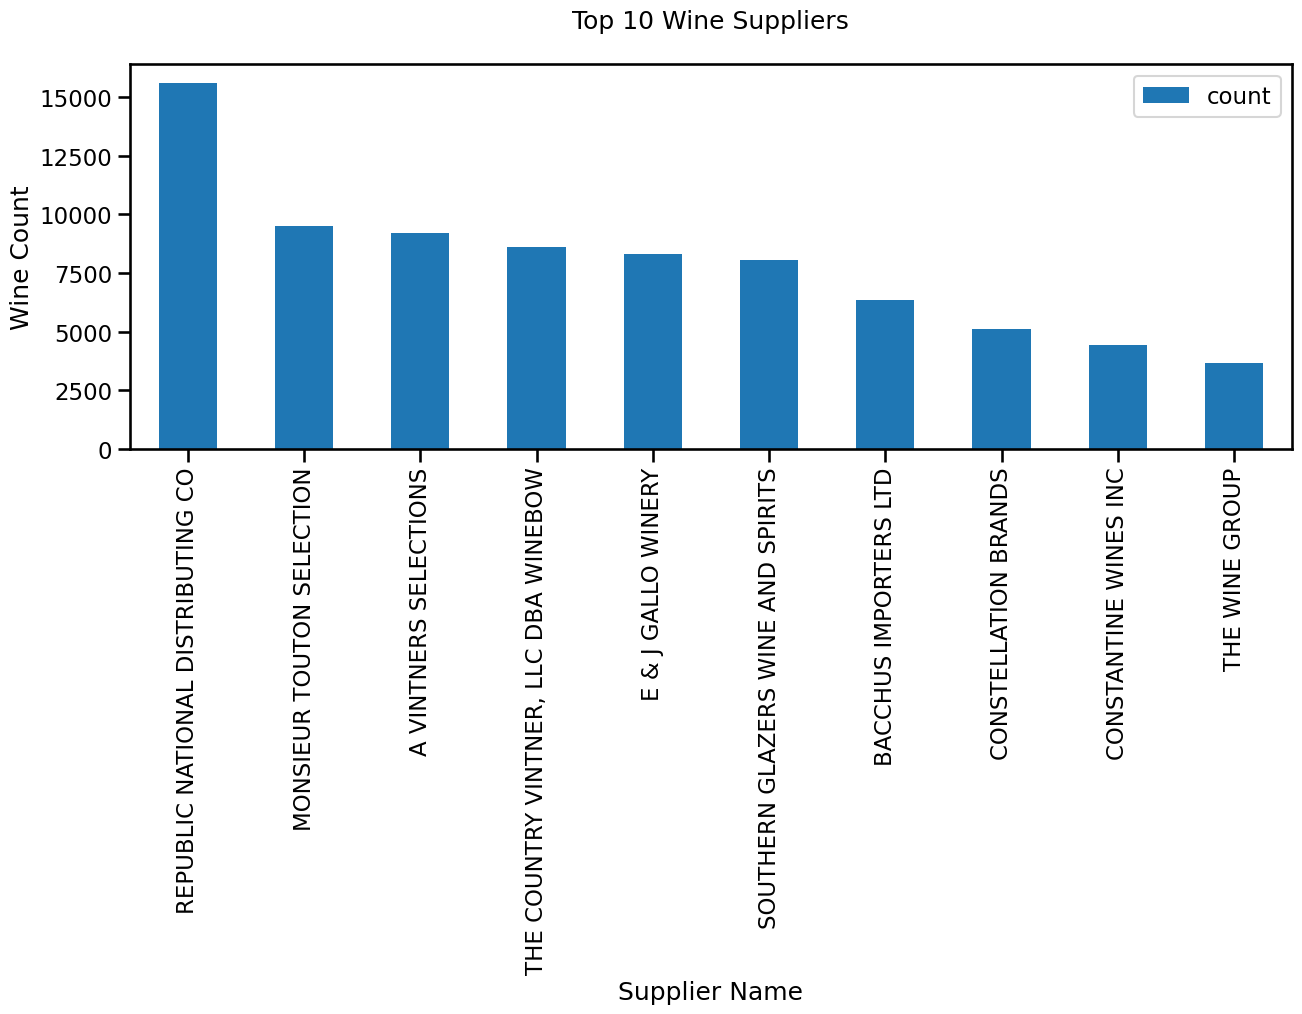

In [55]:
# Top 10 Wine Supplieies in Bar Chart
Item=df[df['Item_Type']=='WINE']
Item[Item["Item_Type"]=='WINE']['Supplier'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["Item_Type"]=='WINE']['Supplier'].value_counts()[0:10]
print("Top 10 Wine Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Wine Suppliers\n')
plt.ylabel('Wine Count')
plt.xlabel('Supplier Name')

**Analyze Sales Over Time**



In [56]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_Code', 'Item_Description',
       'Item_Type', 'Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales',
       'DATE'],
      dtype='object')

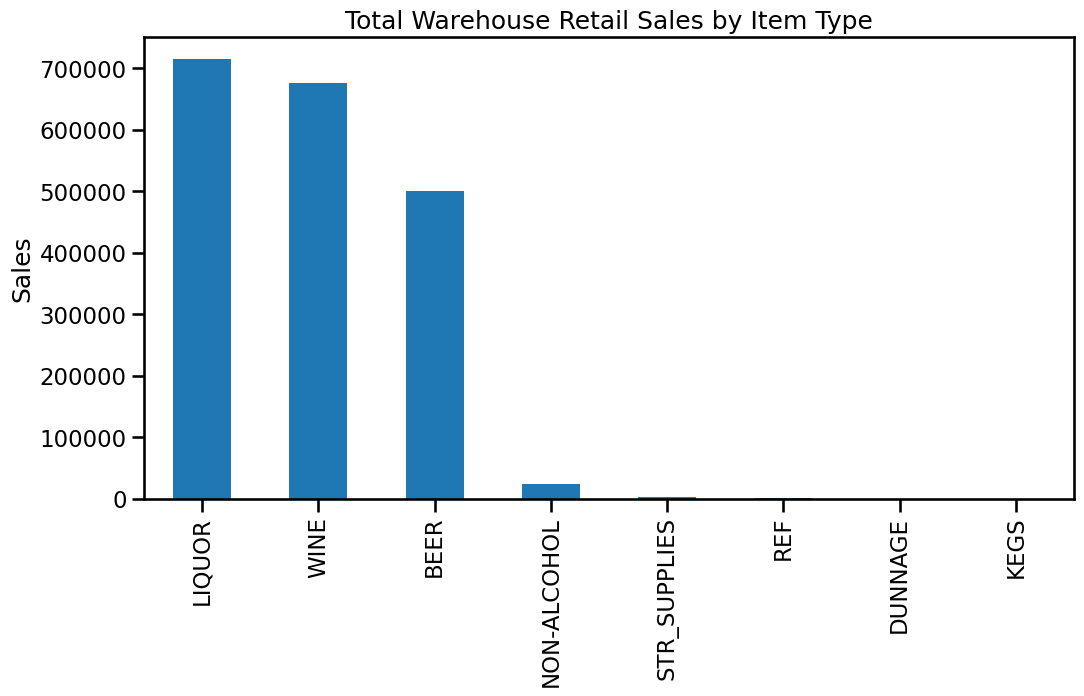

In [57]:
sales_by_department = df.groupby('Item_Type')['Retail_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_department.plot(kind='bar')
plt.title('Total Warehouse Retail Sales by Item Type')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()


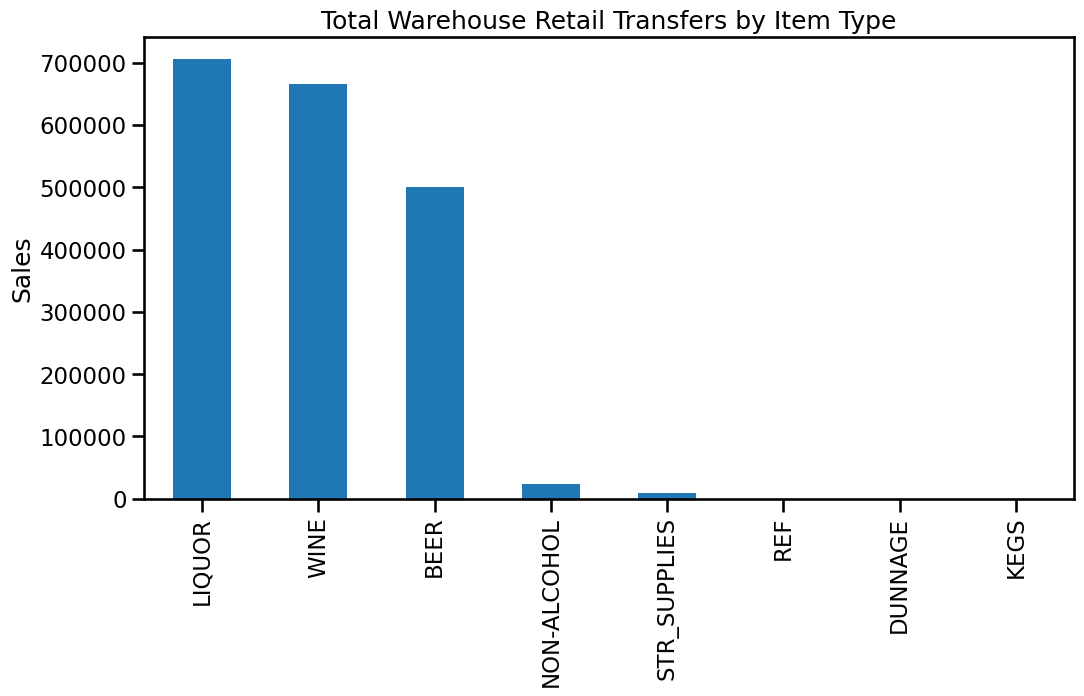

In [58]:
sales_by_department = df.groupby('Item_Type')['Retail_Transfers'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_department.plot(kind='bar')
plt.title('Total Warehouse Retail Transfers by Item Type')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

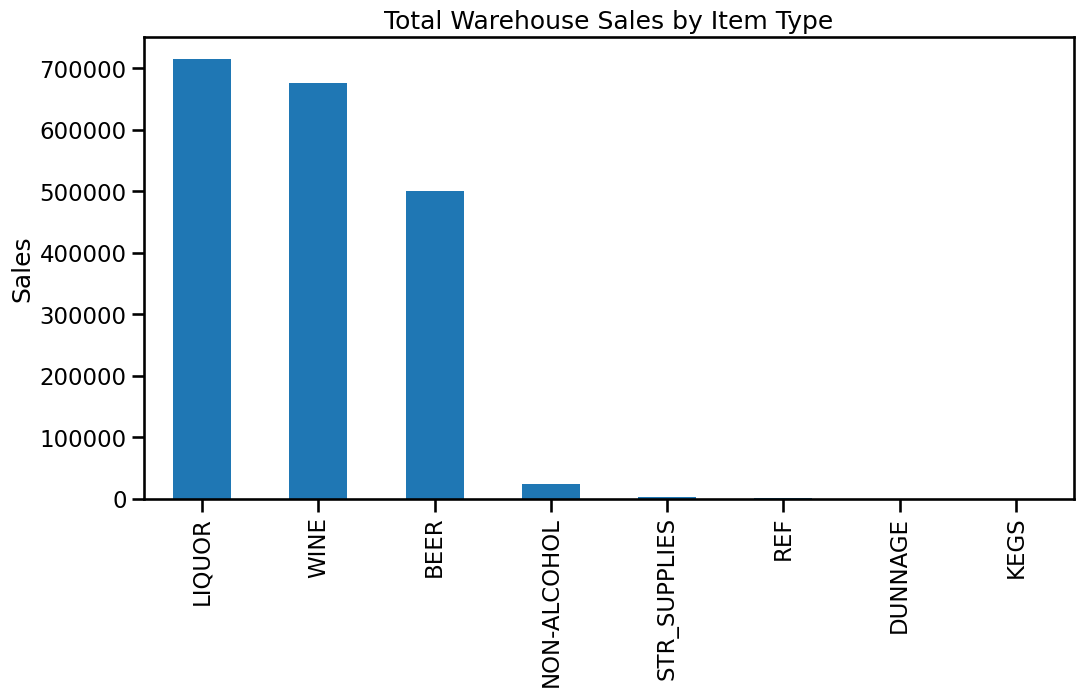

In [59]:
# Assuming there is a 'department' column and 'sales' column
sales_by_department = df.groupby('Item_Type')['Retail_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_department.plot(kind='bar')
plt.title('Total Warehouse Sales by Item Type')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

**Seasonal Trends**


<Figure size 1200x600 with 0 Axes>

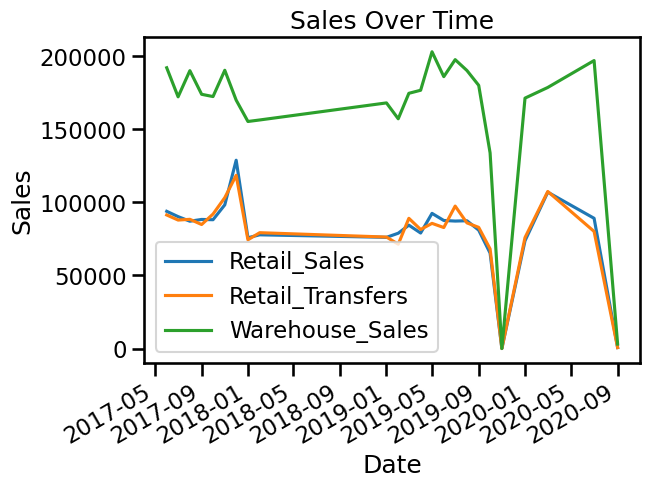

In [60]:
df['DATE'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
sales_over_time = df.groupby('DATE')[['Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales']].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

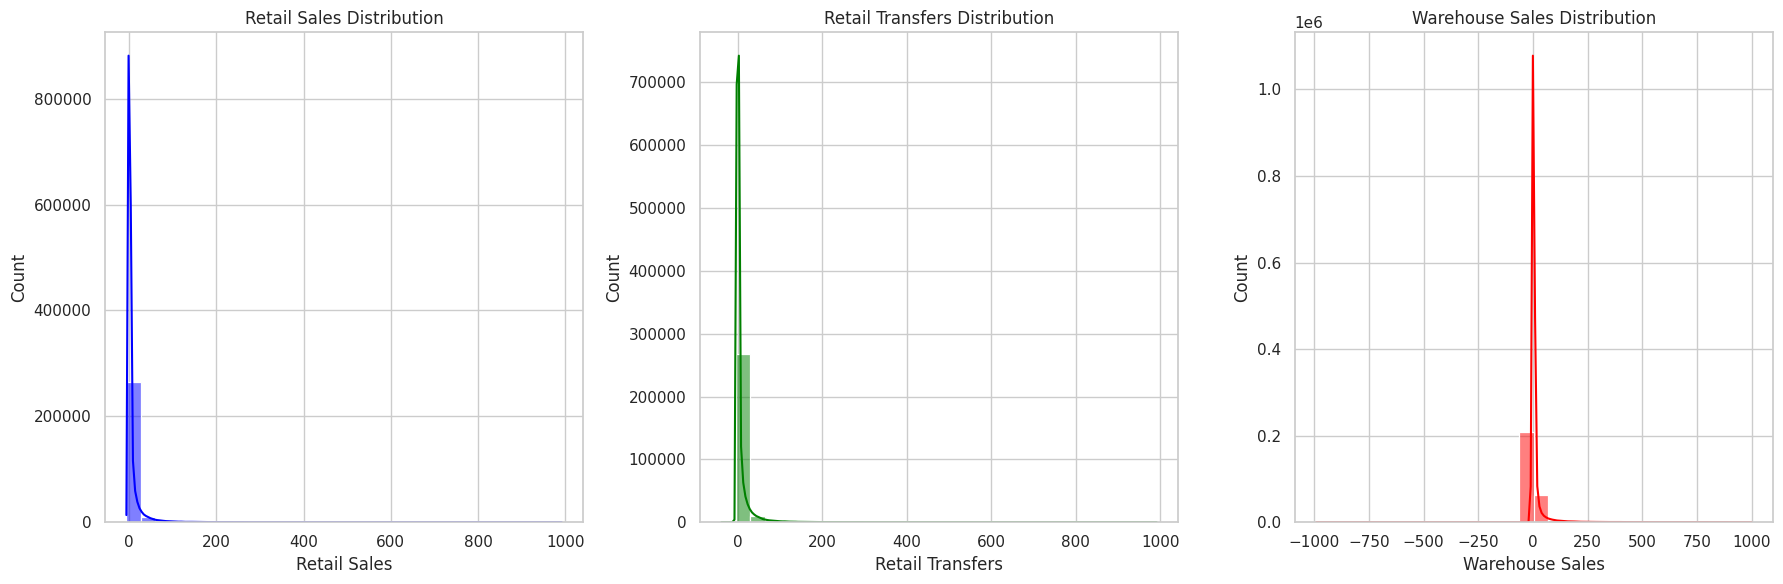

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Retail_Sales'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Retail Sales Distribution')
axes[0].set_xlabel('Retail Sales')
sns.histplot(df['Retail_Transfers'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Retail Transfers Distribution')
axes[1].set_xlabel('Retail Transfers')
sns.histplot(df['Warehouse_Sales'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Warehouse Sales Distribution')
axes[2].set_xlabel('Warehouse Sales')
plt.tight_layout()
plt.show()

                  Retail_Sales  Retail_Transfers  Warehouse_Sales
Retail_Sales          1.000000          0.957946         0.252713
Retail_Transfers      0.957946          1.000000         0.256350
Warehouse_Sales       0.252713          0.256350         1.000000


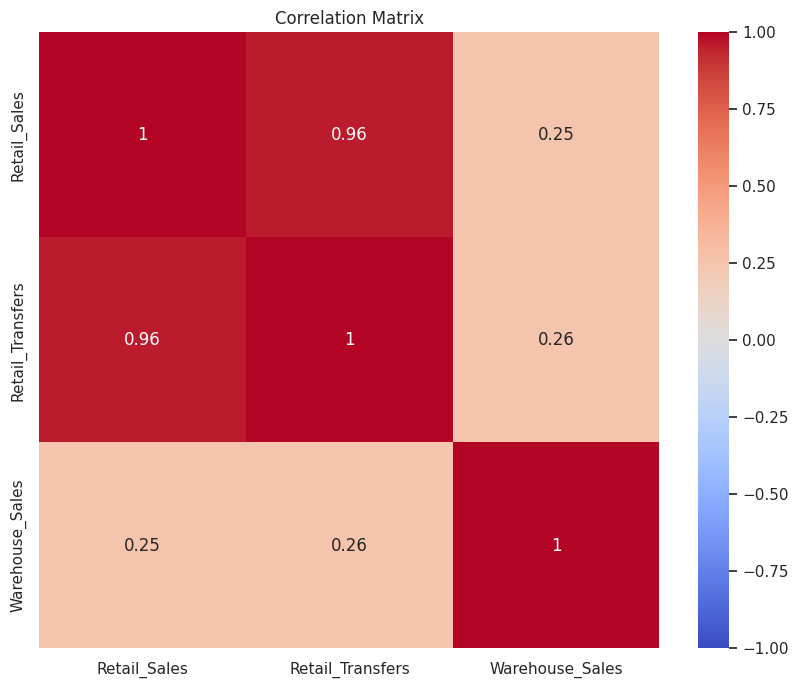

In [62]:
# Correlation Analysis
correlation = df[numeric_columns].corr()
print(correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [63]:
# Reading a CSV file into a pandas DataFrame

# pd.read_csv: This function is used to read a comma-separated values (CSV) file into a pandas DataFrame.

In [64]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/Warehouse_and_Retail_Sales_20240720.csv')

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Convert categorical variables to strings to handle mixed data types
categorical_columns = ['SUPPLIER', 'ITEM DESCRIPTION', 'ITEM TYPE']
for column in categorical_columns:
    df[column] = df[column].astype(str)

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Remove commas from 'RETAIL SALES' and convert to float
df['RETAIL SALES'] = df['RETAIL SALES'].str.replace(',', '').astype(float)

# Clean 'RETAIL TRANSFERS' and 'WAREHOUSE SALES' columns
df['RETAIL TRANSFERS'] = df['RETAIL TRANSFERS'].replace(',', '', regex=True)
df['RETAIL TRANSFERS'] = pd.to_numeric(df['RETAIL TRANSFERS'], errors='coerce').fillna(0)

df['WAREHOUSE SALES'] = df['WAREHOUSE SALES'].replace(',', '', regex=True)
df['WAREHOUSE SALES'] = pd.to_numeric(df['WAREHOUSE SALES'], errors='coerce').fillna(0)

# Ensure all columns are numeric where necessary
for column in df.columns:
    if column not in categorical_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

# Select features and target variable
features = df.drop(columns=['RETAIL SALES'])
target = df['RETAIL SALES']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


(225896, 8) (56474, 8) (225896,) (56474,)
RMSE: 6.180130277303921
R² Score: 0.9650117134245526


**Decision Tree**

In [73]:
from sklearn.tree import DecisionTreeRegressor
# Train a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))
print("Decision Tree R² Score:", r2_score(y_test, y_pred_tree))



Decision Tree RMSE: 14.014921660869945
Decision Tree R² Score: 0.8200678522924995


**Random Forest**

In [74]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 10.020850524922482
Random Forest R² Score: 0.9080108548737319


**Gradient Boosting Machines (GBM)**

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
# Train a Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)
# Evaluate the model
print("GBM RMSE:", mean_squared_error(y_test, y_pred_gbm, squared=False))
print("GBM R² Score:", r2_score(y_test, y_pred_gbm))


GBM RMSE: 9.256327587112189
GBM R² Score: 0.9215117136620019


**XGBoost**

In [77]:
import xgboost as xgb
# Train an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the model
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 13.335911040859042
XGBoost R² Score: 0.8370806028620248


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
# Train an SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)
# Predict on the test set
y_pred_svr = svr_model.predict(X_test)
# Evaluate the model
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR R² Score:", r2_score(y_test, y_pred_svr))

**ARIMA**

In [ ]:
import statsmodels.api as sm
# Assuming 'DATE' column exists and is properly formatted
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
# Fit ARIMA model
arima_model = sm.tsa.ARIMA(df['RETAIL SALES'], order=(5,1,0))
arima_model_fit = arima_model.fit()
# Forecast
y_pred_arima = arima_model_fit.forecast(steps=len(X_test))
# Evaluate the model
print("ARIMA RMSE:", mean_squared_error(y_test, y_pred_arima, squared=False))
print("ARIMA R² Score:", r2_score(y_test, y_pred_arima))

**Neural Networks**

In [ ]:
from sklearn.neural_network import MLPRegressor
# Train a Neural Network model
nn_model = MLPRegressor(random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)
# Predict on the test set
y_pred_nn = nn_model.predict(X_test)
# Evaluate the model
print("Neural Network RMSE:", mean_squared_error(y_test, y_pred_nn, squared=False))
print("Neural Network R² Score:", r2_score(y_test, y_pred_nn))